<a href="https://colab.research.google.com/github/OscarOvanger/GeoDecepticon/blob/main/training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is where the training goes down

 We start of by installing the requirements

In [12]:
!pip install numpy
!pip install torch
!pip install torchvision
!pip install matplotlib
!pip install wandb

In [13]:
!git clone https://github.com/OscarOvanger/GeoDecepticon.git

Cloning into 'GeoDecepticon'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 95 (delta 41), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 2.58 MiB | 1.63 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [14]:
import os
os.chdir('/content/GeoDecepticon')

In [15]:
from dataloader import BinaryImageDataset, preprocess_image
from transformer import VisionTransformer
import torch
import torch.optim as optim
import torch.nn as nn
import wandb
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sample import reconstruct_image_from_patches
import matplotlib.colors as mcolors
from torch.optim.lr_scheduler import ReduceLROnPlateau
from matplotlib import colors
import os

training data shape:  (6000, 64, 64)
test data shape:  (3423, 64, 64)


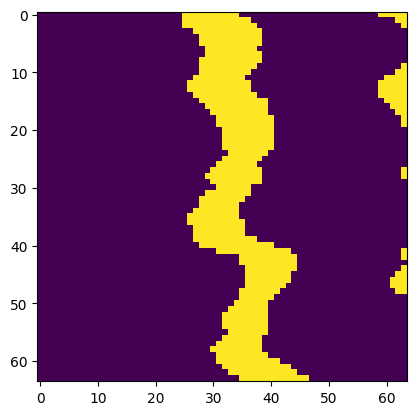

In [16]:
data_1 = np.load("data_array_1.npz")
data_2 = np.load("data_array_2.npz")
data_3 = np.load("data_array_3.npz")

data_array_1 = data_1['data_array']
data_array_2 = data_2['data_array']
data_array_3 = data_3['data_array']

training_data = np.concatenate((data_array_1, data_array_2), axis=0)
test_data = data_array_3
print("training data shape: ", training_data.shape)
print("test data shape: ", test_data.shape)

plt.imshow(training_data[0])
plt.show()

In [17]:
# Define the embedding matrix (16 embeddings of dimension 4)
embedding_matrix = torch.zeros((17, 4))

# Generate all possible 2x2 binary patches
patches = torch.tensor([
    [a, b, c, d]
    for a in range(2)
    for b in range(2)
    for c in range(2)
    for d in range(2)
])

# Calculate the embeddings
for i, patch in enumerate(patches):
    total_ones = patch.sum().item()
    if total_ones == 0:
        # Avoid division by zero, leave as zeros (or handle as needed)
        continue
    # Define the positions in the patch
    left_column = patch[::2].sum().item()
    right_column = patch[1::2].sum().item()
    lower_row = patch[2:].sum().item()
    upper_row = patch[:2].sum().item()

    # Fill the embedding matrix
    embedding_matrix[i, 0] = left_column / total_ones
    embedding_matrix[i, 1] = right_column / total_ones
    embedding_matrix[i, 2] = lower_row / total_ones
    embedding_matrix[i, 3] = upper_row / total_ones
embedding_matrix[-1,:] = torch.ones(4) # This is the masked embedding matrix
print("Embedding Matrix:\n", embedding_matrix)

Embedding Matrix:
 tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0000, 1.0000, 0.0000],
        [1.0000, 0.0000, 1.0000, 0.0000],
        [0.5000, 0.5000, 1.0000, 0.0000],
        [0.0000, 1.0000, 0.0000, 1.0000],
        [0.0000, 1.0000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000, 0.5000],
        [0.3333, 0.6667, 0.6667, 0.3333],
        [1.0000, 0.0000, 0.0000, 1.0000],
        [0.5000, 0.5000, 0.5000, 0.5000],
        [1.0000, 0.0000, 0.5000, 0.5000],
        [0.6667, 0.3333, 0.6667, 0.3333],
        [0.5000, 0.5000, 0.0000, 1.0000],
        [0.3333, 0.6667, 0.3333, 0.6667],
        [0.6667, 0.3333, 0.3333, 0.6667],
        [0.5000, 0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000, 1.0000]])


In [18]:
# Load the model parameters
checkpoint = torch.load("vision_transformer_final.pth")
model.load_state_dict(checkpoint)  # Load model weights

<ipython-input-18-8c70fc123b8d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("vision_transformer_final.pth")


<All keys matched successfully>

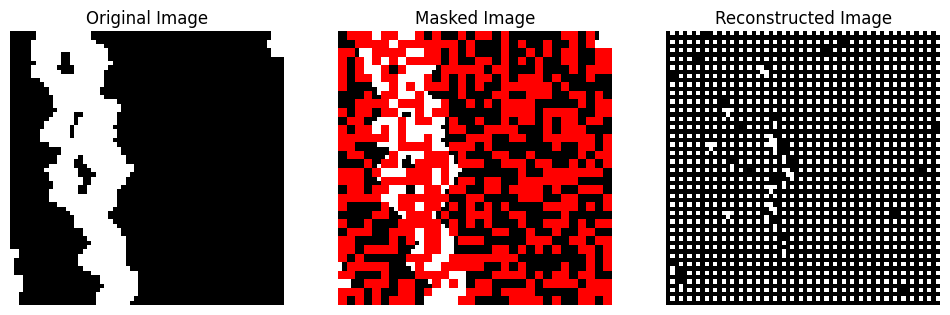

Epoch [1/1000] completed. Average Loss: 2.7776


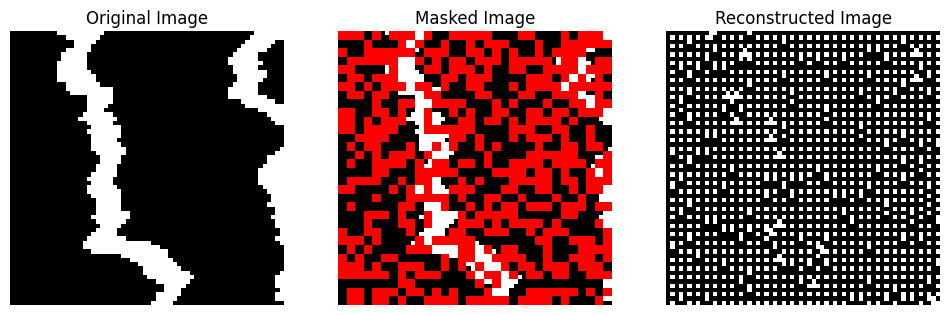

Epoch [2/1000] completed. Average Loss: 2.0800


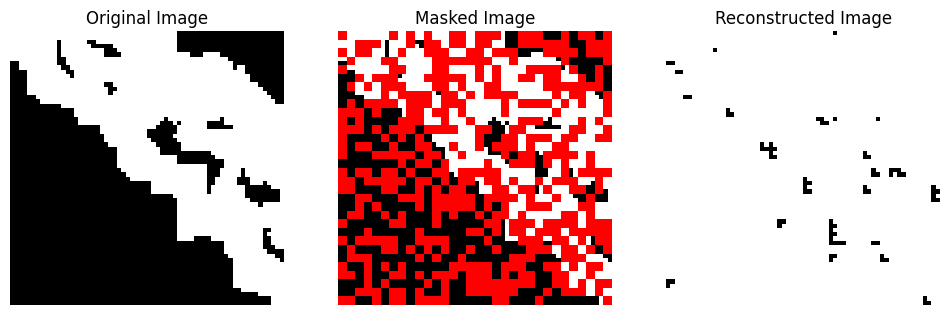

Epoch [3/1000] completed. Average Loss: 1.6808


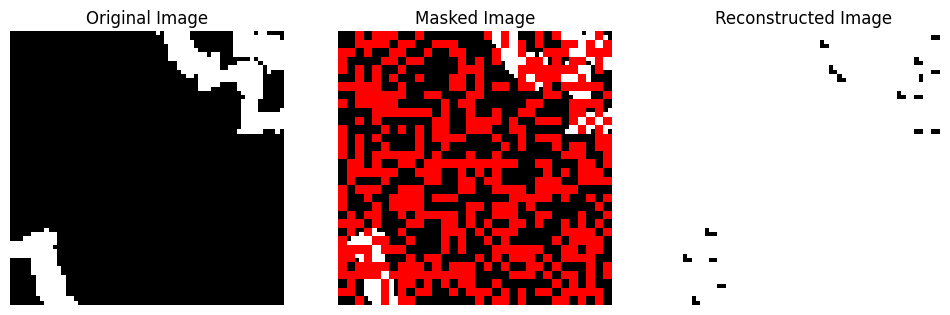

Epoch [4/1000] completed. Average Loss: 1.3970


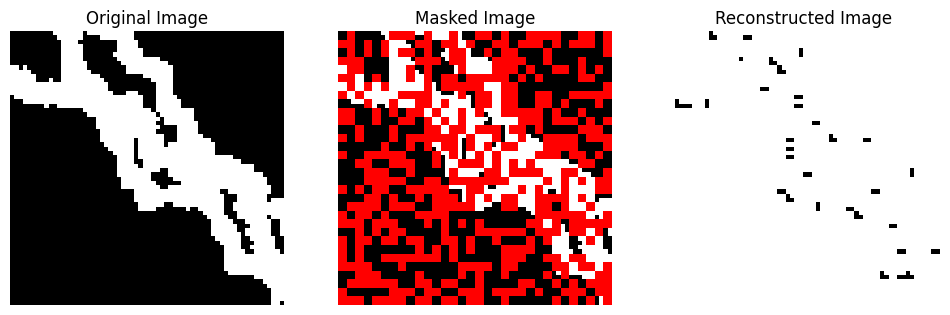

Epoch [5/1000] completed. Average Loss: 1.2316


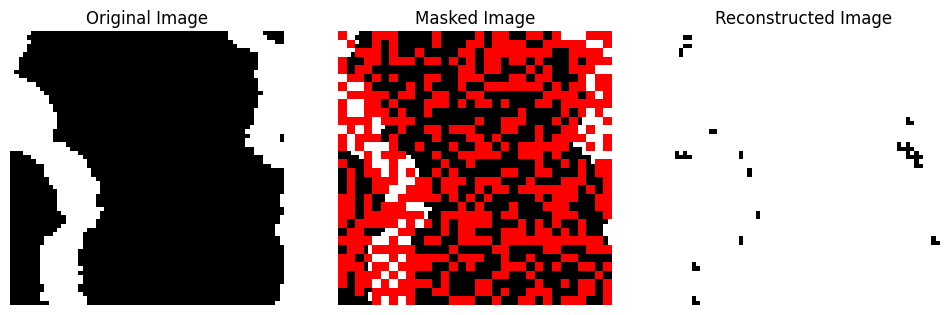

Epoch [6/1000] completed. Average Loss: 1.1394


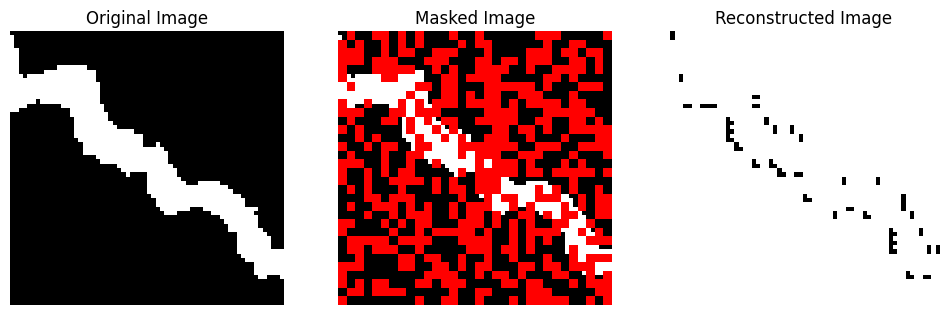

Epoch [7/1000] completed. Average Loss: 1.0874


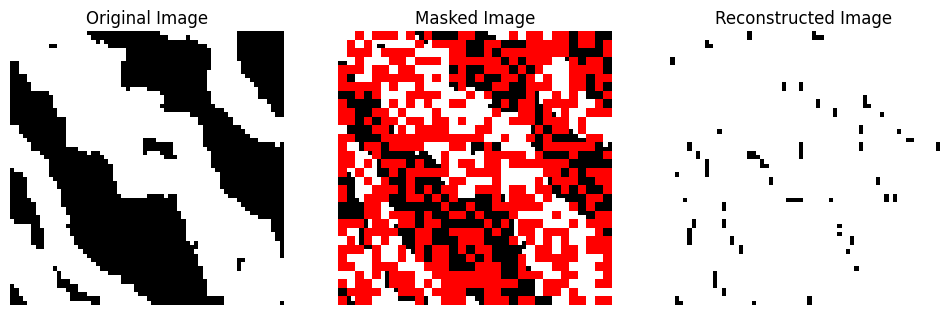

Epoch [8/1000] completed. Average Loss: 1.0535


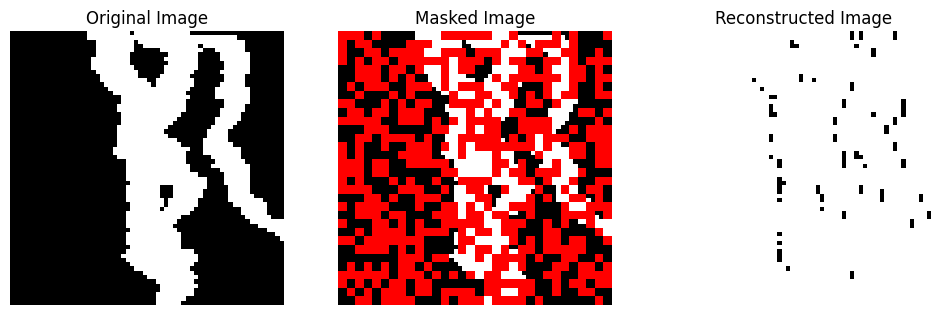

Epoch [9/1000] completed. Average Loss: 1.0288


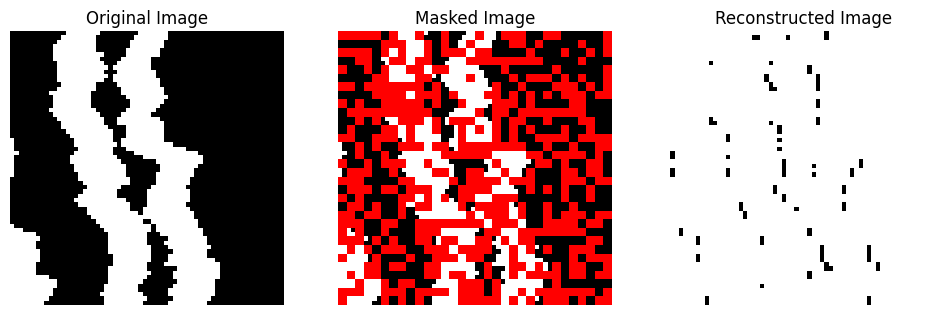

Epoch [10/1000] completed. Average Loss: 1.0064


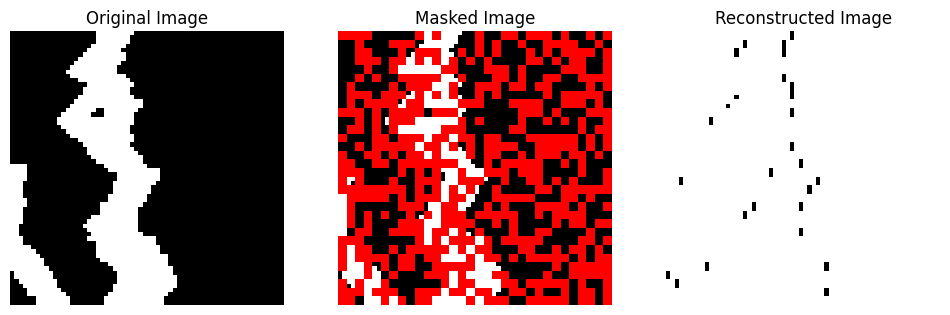

Epoch [11/1000] completed. Average Loss: 0.9861


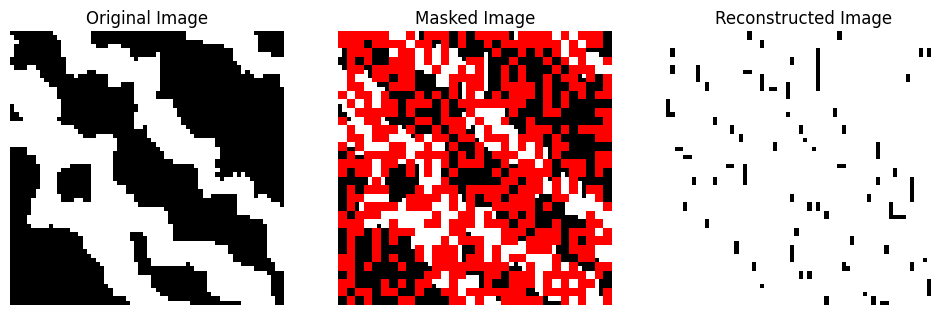

Epoch [12/1000] completed. Average Loss: 0.9642


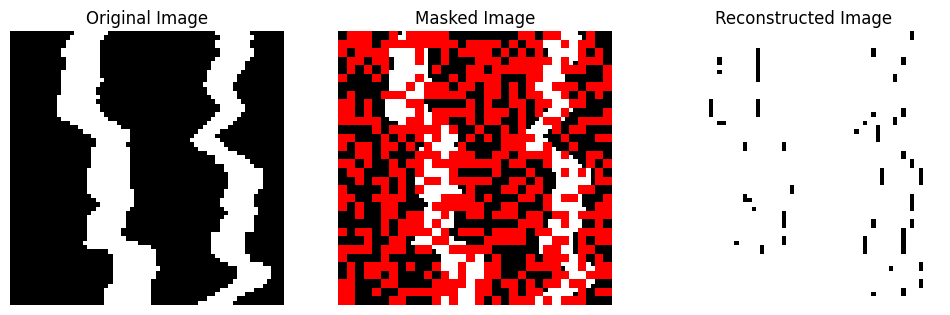

Epoch [13/1000] completed. Average Loss: 0.9433


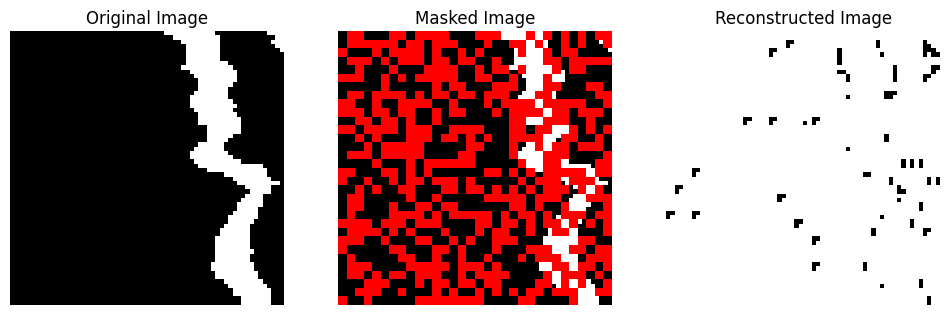

Epoch [14/1000] completed. Average Loss: 0.9242


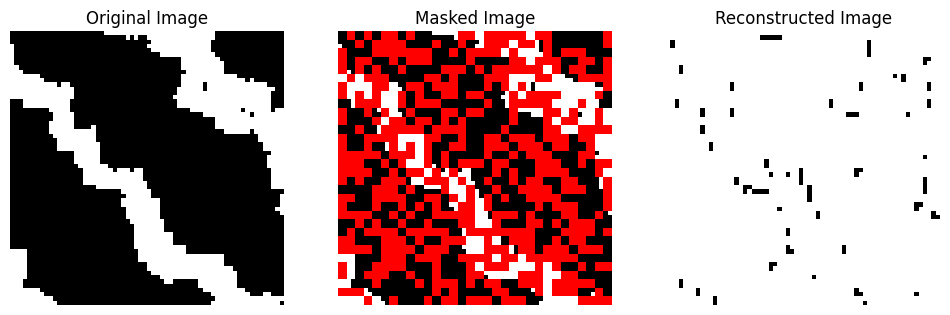

Epoch [15/1000] completed. Average Loss: 0.9091


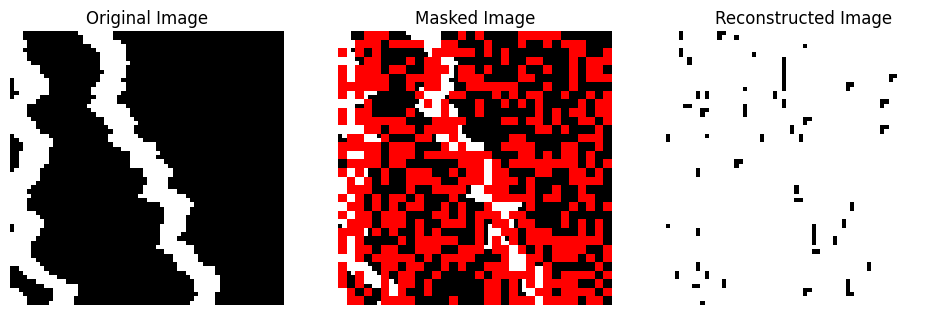

Epoch [16/1000] completed. Average Loss: 0.8955


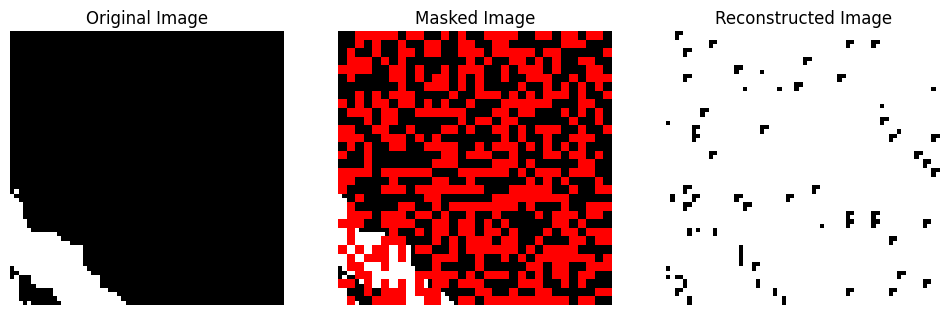

Epoch [17/1000] completed. Average Loss: 0.8820


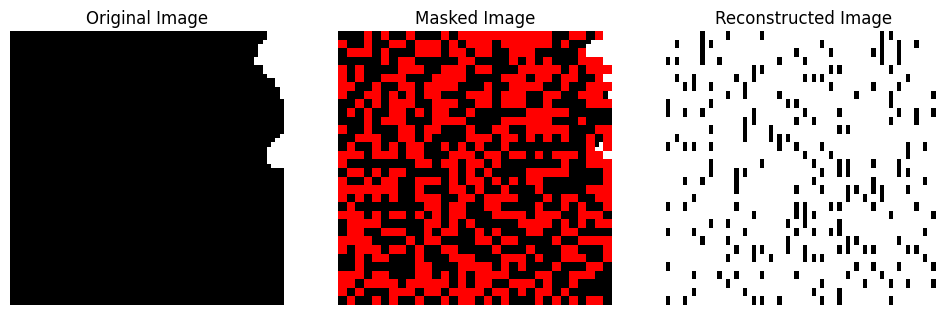

Epoch [18/1000] completed. Average Loss: 0.8699


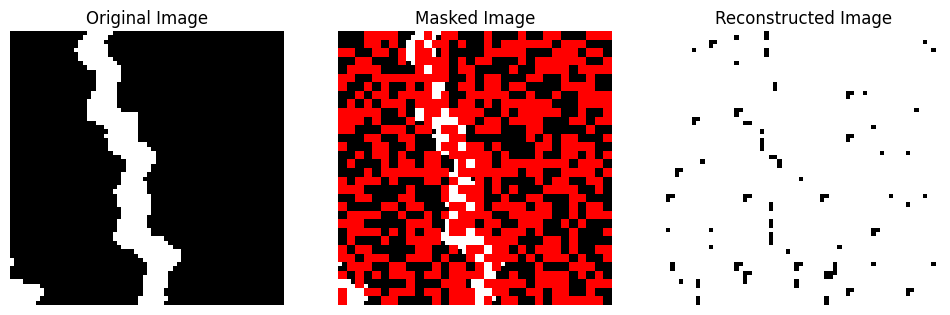

Epoch [19/1000] completed. Average Loss: 0.8581


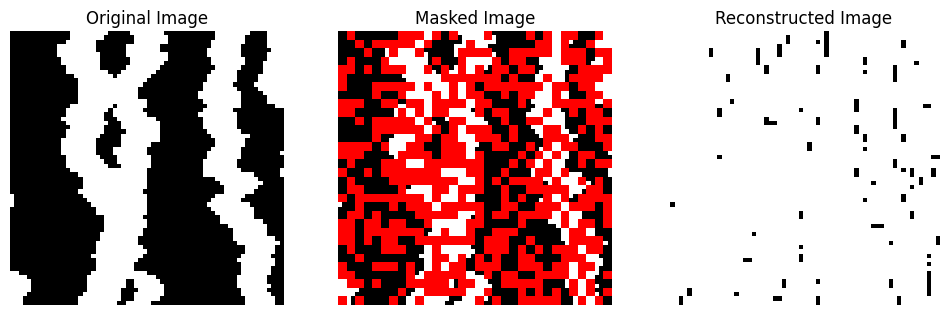

Epoch [20/1000] completed. Average Loss: 0.8478


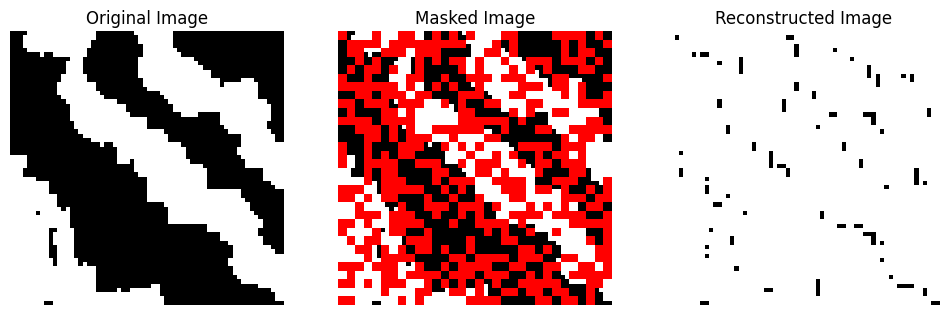

Epoch [21/1000] completed. Average Loss: 0.8382


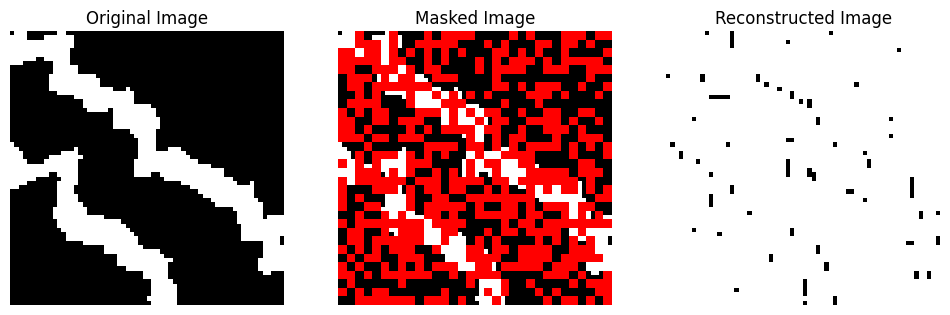

Epoch [22/1000] completed. Average Loss: 0.8294


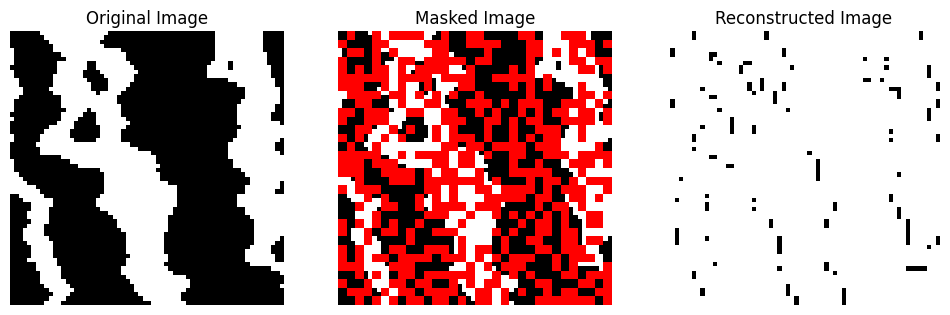

Epoch [23/1000] completed. Average Loss: 0.8215


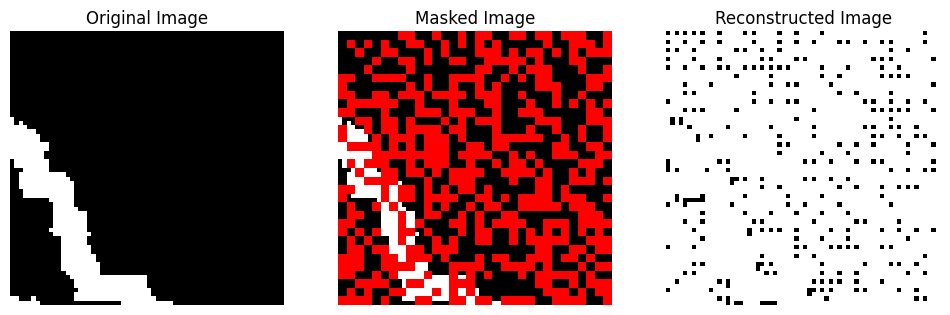

Epoch [24/1000] completed. Average Loss: 0.8143


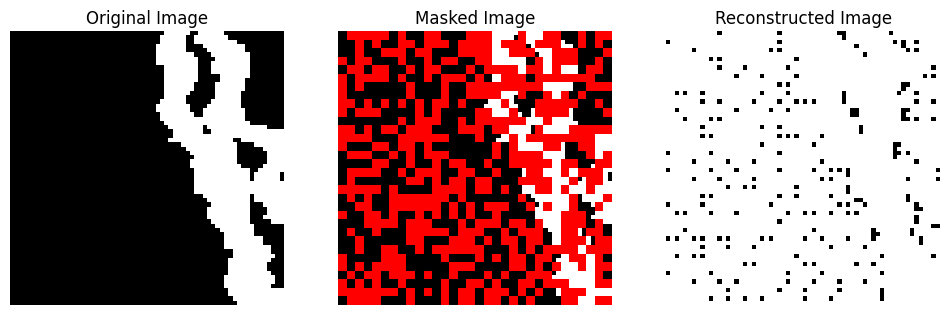

Epoch [25/1000] completed. Average Loss: 0.8070


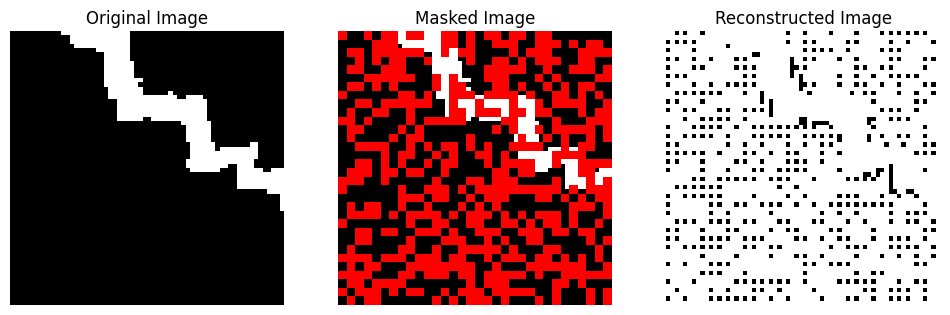

Epoch [26/1000] completed. Average Loss: 0.8013


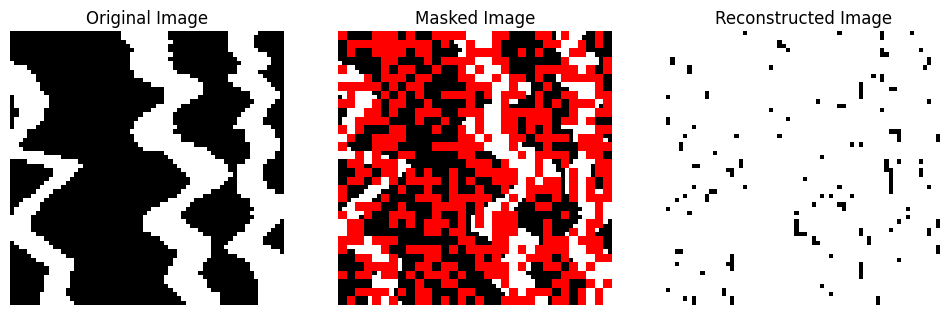

Epoch [27/1000] completed. Average Loss: 0.7951


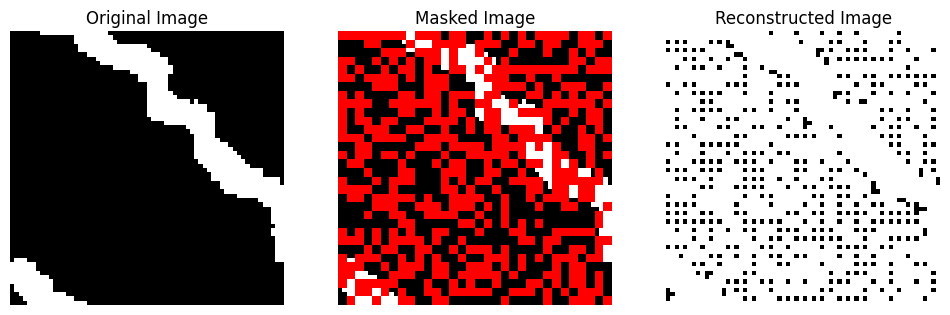

Epoch [28/1000] completed. Average Loss: 0.7887


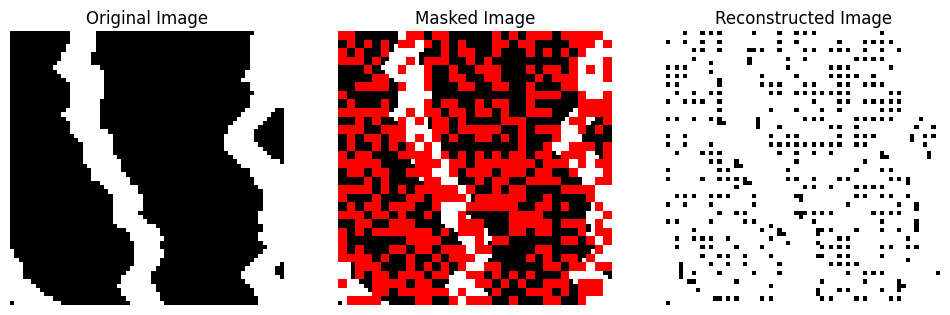

Epoch [29/1000] completed. Average Loss: 0.7829


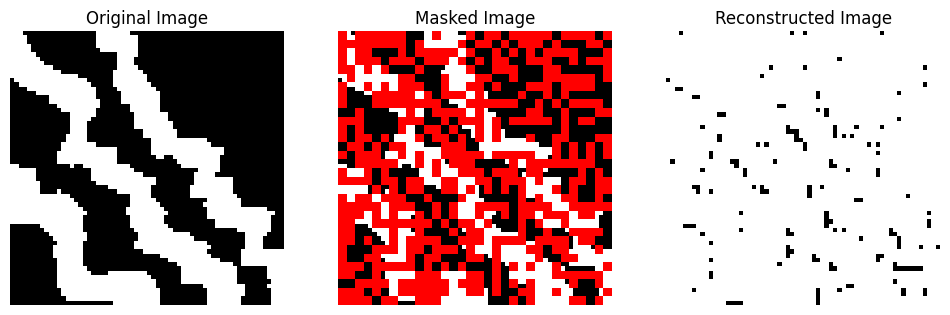

Epoch [30/1000] completed. Average Loss: 0.7772


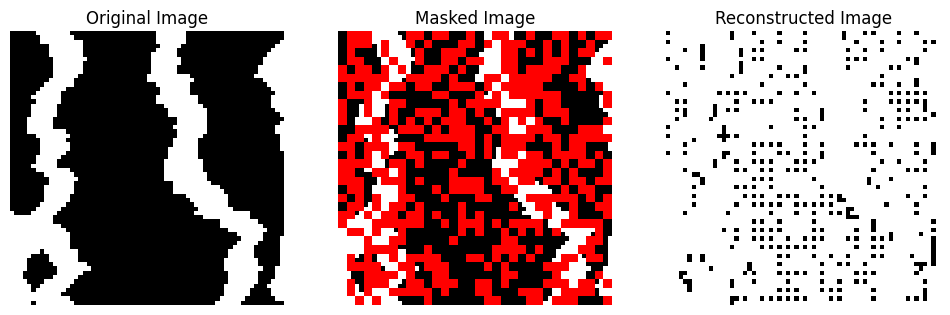

Epoch [31/1000] completed. Average Loss: 0.7712


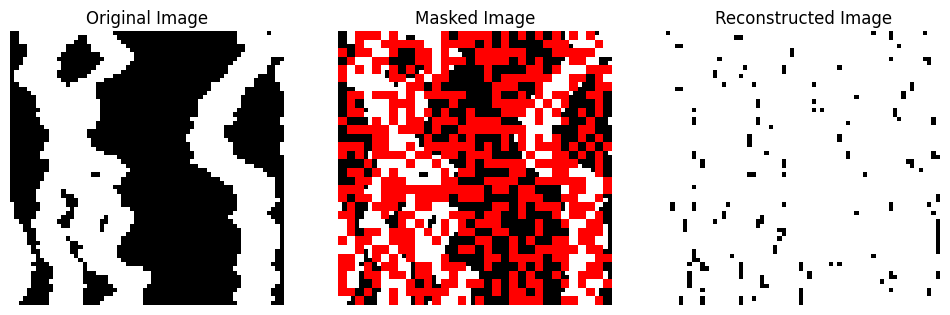

Epoch [32/1000] completed. Average Loss: 0.7658


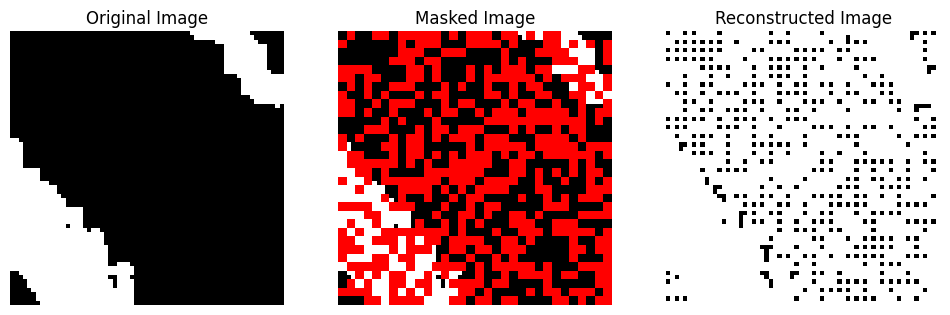

Epoch [33/1000] completed. Average Loss: 0.7584


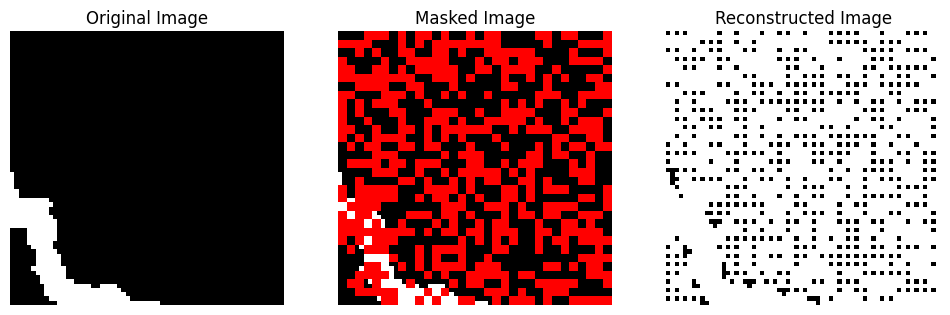

Epoch [34/1000] completed. Average Loss: 0.7532


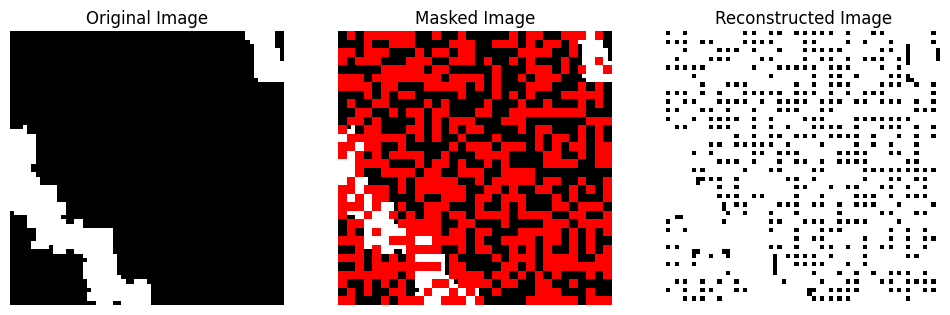

Epoch [35/1000] completed. Average Loss: 0.7470


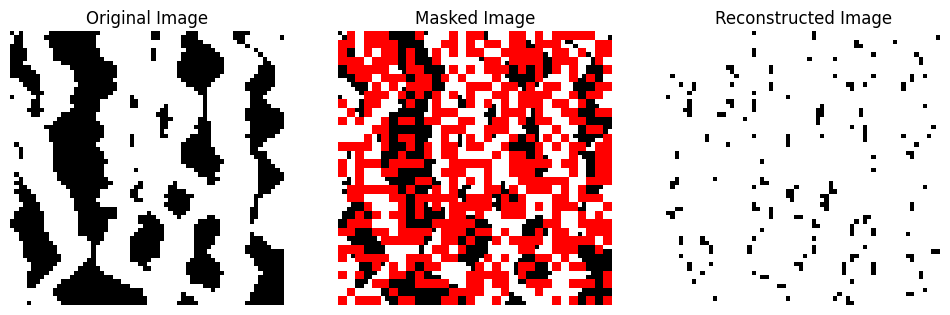

Epoch [36/1000] completed. Average Loss: 0.7408


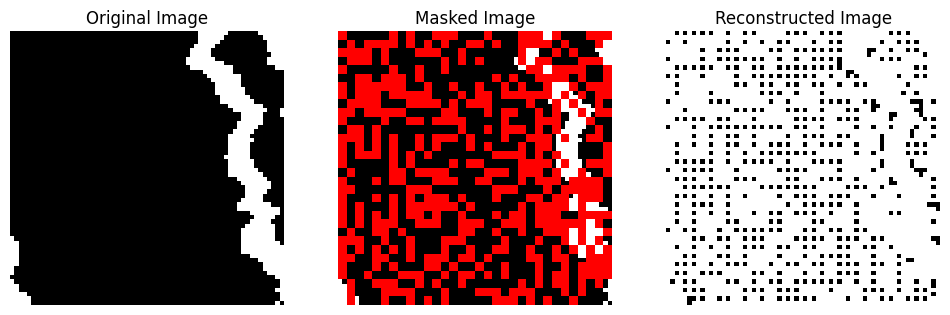

Epoch [37/1000] completed. Average Loss: 0.7367


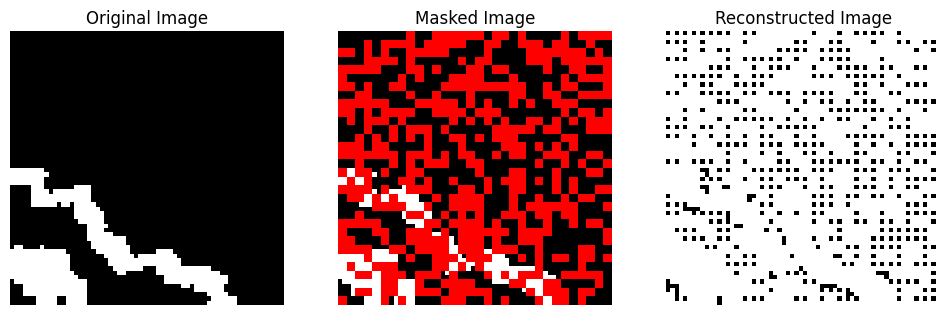

Epoch [38/1000] completed. Average Loss: 0.7315


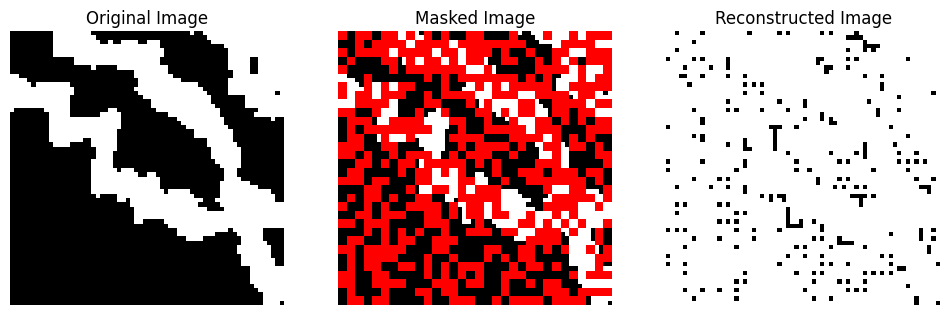

Epoch [39/1000] completed. Average Loss: 0.7262


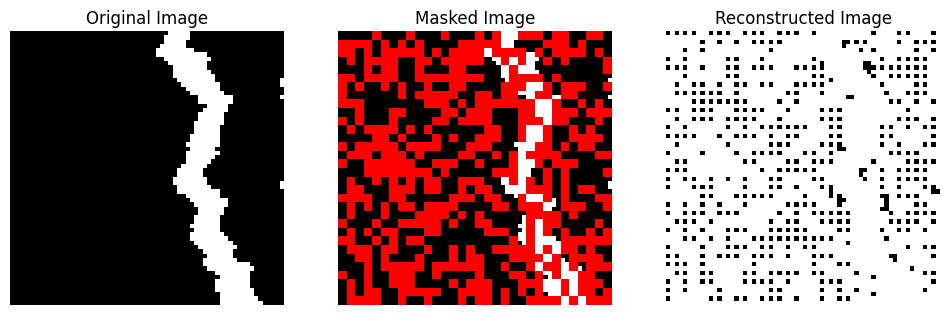

Epoch [40/1000] completed. Average Loss: 0.7224


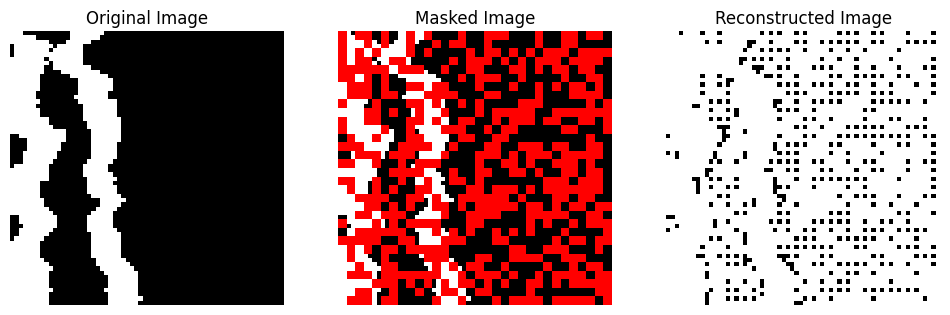

Epoch [41/1000] completed. Average Loss: 0.7182


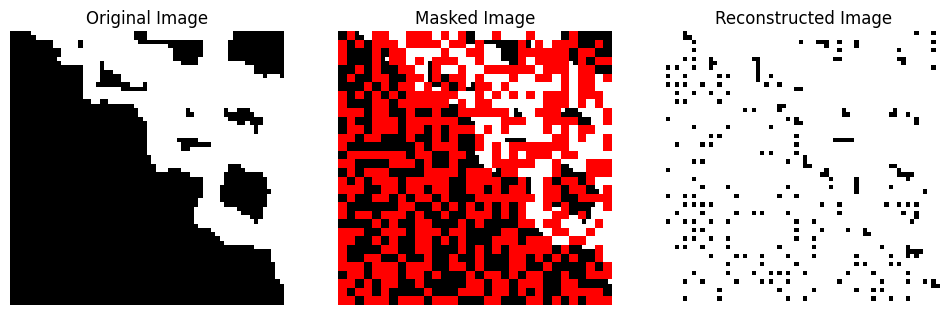

Epoch [42/1000] completed. Average Loss: 0.7137


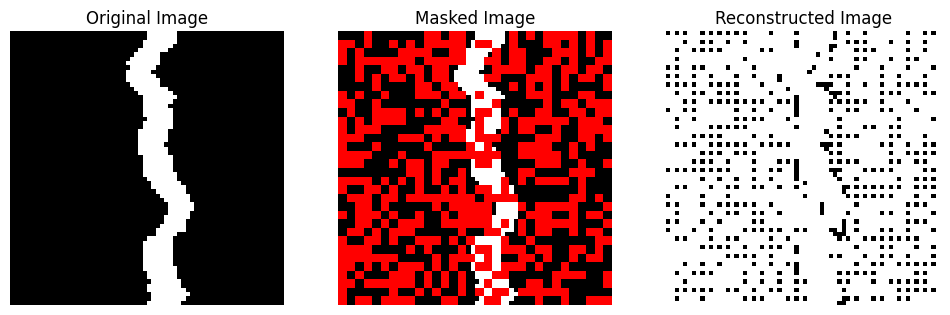

Epoch [43/1000] completed. Average Loss: 0.7113


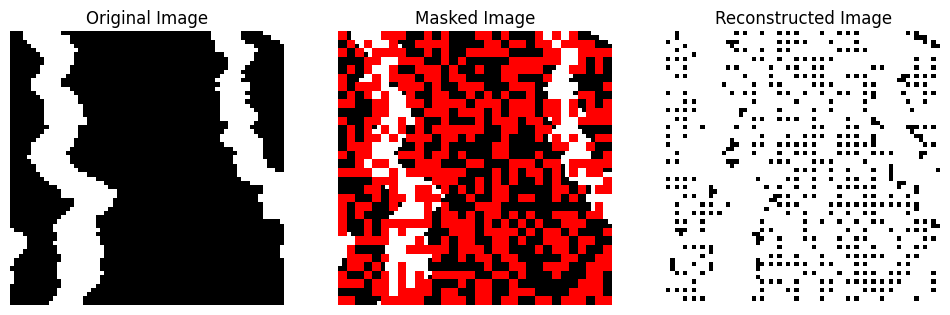

Epoch [44/1000] completed. Average Loss: 0.7071


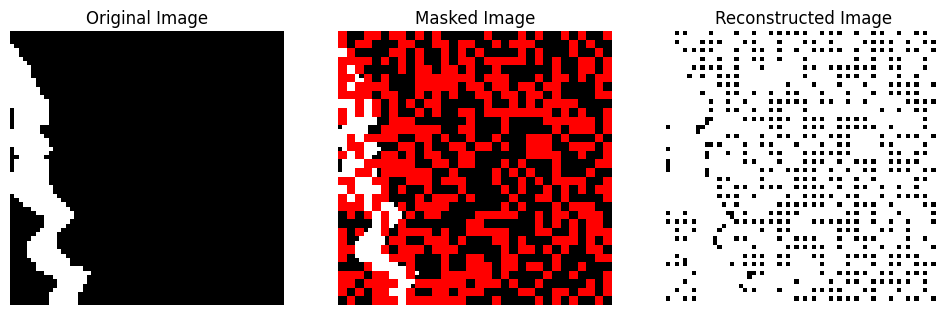

KeyboardInterrupt: 

In [21]:
# Convert to tensors, should be type Long
training_images = torch.tensor(training_data, dtype=torch.long)
test_images = torch.tensor(test_data, dtype=torch.long)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from matplotlib import colors
import os

# Parameters
batch_size = 32
embed_dim = 4
num_heads = 2
feedforward_dim = 16
num_layers = 4
num_tokens = 17  # 16 tokens + 1 mask token
max_patches = 32 * 32
dropout = 0.2
learning_rate = 3e-4
num_epochs = 1000
initial_mask_rate = 0.5
final_mask_rate = 0.15

# Dataset and DataLoader
dataset = BinaryImageDataset(training_images)  # Assumes training_images is already loaded
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model
model = VisionTransformer(embed_dim, num_heads, feedforward_dim, num_layers, num_tokens, max_patches, dropout).to(device)

# Define optimizer and scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=20):
        self.patience = patience
        self.best_loss = None
        self.counter = 0

    def __call__(self, validation_loss):
        if self.best_loss is None or validation_loss < self.best_loss:
            self.best_loss = validation_loss
            self.counter = 0
        else:
            self.counter += 1
        return self.counter >= self.patience

early_stopping = EarlyStopping()

# Custom colormap for visualization
cmap = colors.ListedColormap(['red', 'black', 'white'])  # Red for masked, black for 0, white for 1
bounds = [-1.5, -0.5, 0.5, 1.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Directory to save checkpoints
os.makedirs("checkpoints", exist_ok=True)

# Training Loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    current_mask_rate = initial_mask_rate - (epoch / num_epochs) * (initial_mask_rate - final_mask_rate)

    for batch_idx, images in enumerate(dataloader):
        # Preprocess images
        patch_indices = torch.stack([preprocess_image(img) for img in images]).long()
        masked_patches = patch_indices.clone()

        # Masking
        mask = torch.rand(masked_patches.shape) < current_mask_rate
        masked_patches[mask] = num_tokens - 1  # Assign mask token index (16 for num_tokens=17)

        # Calculate token weights dynamically
        token_counts = torch.bincount(patch_indices.view(-1), minlength=num_tokens)  # Count tokens in patches
        mask_token_count = mask.sum().item()  # Count occurrences of the mask token
        token_counts[-1] = mask_token_count  # Assign mask count to the last token
        token_weights = 1.0 / (token_counts + 1e-6)  # Avoid divide-by-zero
        token_weights = token_weights / token_weights.sum()  # Normalize
        token_weights = token_weights.to(device)

        # Define weighted CrossEntropyLoss
        criterion = nn.CrossEntropyLoss(weight=token_weights)

        # Move to device
        masked_patches, patch_indices, mask = (
            masked_patches.to(device),
            patch_indices.to(device),
            mask.to(device),
        )

        # Forward pass
        logits = model(masked_patches, mask)
        loss = criterion(logits.view(-1, num_tokens), patch_indices.view(-1))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Visualization for the first batch in the epoch
        if batch_idx == 0:
            with torch.no_grad():
                predicted_indices = torch.argmax(logits, dim=-1).cpu()[0]
                reconstructed_image = reconstruct_image_from_patches(predicted_indices)

                # Convert masked patches for visualization
                visualized_masked_patches = masked_patches.cpu()[0].clone()
                visualized_masked_patches[visualized_masked_patches == num_tokens - 1] = -1
                masked_image = reconstruct_image_from_patches(visualized_masked_patches)

                # Plot images
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 3, 1)
                plt.title("Original Image")
                plt.imshow(reconstruct_image_from_patches(patch_indices.cpu()[0]), cmap="gray")
                plt.axis("off")

                plt.subplot(1, 3, 2)
                plt.title("Masked Image")
                plt.imshow(masked_image, cmap=cmap, norm=norm)
                plt.axis("off")

                plt.subplot(1, 3, 3)
                plt.title("Reconstructed Image")
                plt.imshow(reconstructed_image, cmap="gray")
                plt.axis("off")

                plt.show()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}] completed. Average Loss: {avg_loss:.4f}")

    # Scheduler step
    scheduler.step(avg_loss)

    # Early stopping check
    if early_stopping(avg_loss):
        print(f"Early stopping at epoch {epoch+1}")
        break

    # Save checkpoint periodically
    if (epoch + 1) % 50 == 0:
        torch.save(
            {
                "epoch": epoch + 1,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "loss": avg_loss,
            },
            f"checkpoints/vision_transformer_epoch_{epoch+1}.pth",
        )
        print(f"Checkpoint saved for epoch {epoch+1}")

# Save the final model
torch.save(model.state_dict(), "vision_transformer_final_balanced.pth")
print("Final model saved as 'vision_transformer_final_balanced.pth'.")

# Sampling